# Corn Tassel Detection Using Computer Vision Techniques

## Part 1

### Pre-processing

In [1]:
#Most used libraries 
import pandas as pd
import numpy as np
import cv2

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12, 12]
#%matplotlib inline 

In [2]:
#re-naming files to remove special characters from the name
#repeat for each folder

from PIL import Image
import glob
import os 

os.chdir('/Users/petri142/CornTasselingProject/rawrbg7.15.21')

path = '/Users/petri142/CornTasselingProject/rawrbg7.15.21'
images = []
count= 1
for pic in glob.glob('*.jpg'): 
    im=Image.open(pic)
    images.append(im)
    os.rename(path + "/"
              + pic, path
              + "/"
              + 'image' + str(count) + '.jpg')
    count += 1

#### Crop

In [3]:
import keras
import tensorflow as tf
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [4]:
#run a loop to pre-process the images
#crop the outside 25% to remove distortion
#renaming to include dates

os.chdir('/Users/petri142/CornTasselingProject/rawrbg7.27.21')

count= 1
for raw_image in glob.glob('*.jpg'): 
    #open 
    image = tf.io.read_file(raw_image)
    image = tf.image.decode_jpeg(image)
   
    #crop 
    cropped_cornpic = tf.image.central_crop(image, .75)
    
    #rename
    new_name = 'Img_07272021_' + str(count) + '.jpg'
    count += 1
    
    #save with new name
    tf.keras.utils.save_img(new_name, cropped_cornpic, file_format='jpeg', scale=True)

2021-11-28 17:15:05.828509: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Exploration

#### Thresholding & Channel Historgrams

In [5]:
#change directory to where the cropped images are stored
#the "out of bounds" image was deleted

os.chdir('/Users/petri142/CornTasselingProject/croppedrbg')

(2250, 3000, 3)


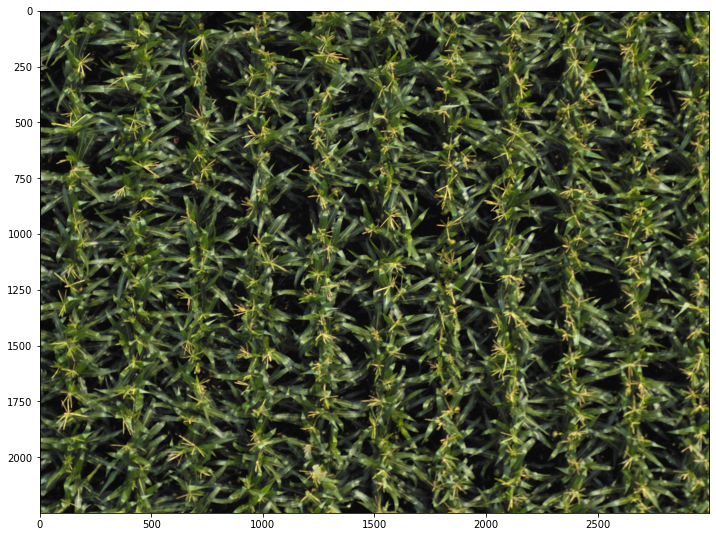

In [6]:
#open an image
img = cv2.imread('Img_07152021_9.jpg')

#convert it from BGR to RGB
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#splitting into rbg channels
r, g, b = cv2.split(img_color)

#convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#inspect the shape of the image
print(img_color.shape)

#display the image
plt.imshow(img_color)

In [7]:
from skimage.exposure import histogram
hist, hist_centers = histogram(gray)
rhist, rhist_centers = histogram(r)
ghist, ghist_centers = histogram(g)
bhist, bhist_centers = histogram(b)

Text(0.5, 1.0, 'histogram of gray values')

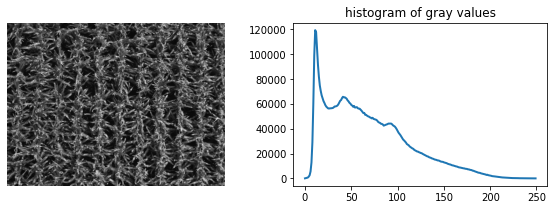

In [8]:
#creating and display gray histogram
gr_fig, gr_axes = plt.subplots(1, 2, figsize=(10, 3))
gr_axes[0].imshow(gray, cmap=plt.cm.gray)
gr_axes[0].axis('off')
gr_axes[1].plot(hist_centers, hist, lw=2)
gr_axes[1].set_title('histogram of gray values')

Text(0.5, 1.0, 'histogram of r values')

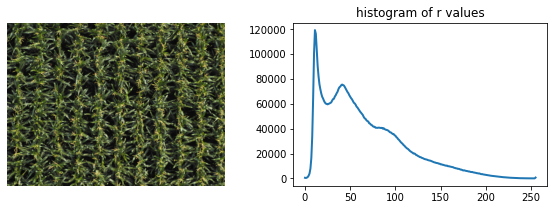

In [9]:
#creating and display Red histogram
r_fig, r_axes = plt.subplots(1, 2, figsize=(10, 3))
r_axes[0].imshow(img_color)
r_axes[0].axis('off')
r_axes[1].plot(rhist_centers, rhist, lw=2)
r_axes[1].set_title('histogram of r values')

Text(0.5, 1.0, 'histogram of g values')

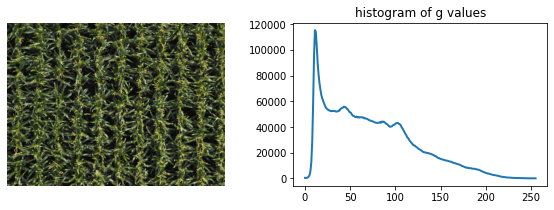

In [10]:
#creating and display Green histogram
g_fig, g_axes = plt.subplots(1, 2, figsize=(10, 3))
g_axes[0].imshow(img_color)
g_axes[0].axis('off')
g_axes[1].plot(ghist_centers, ghist, lw=2)
g_axes[1].set_title('histogram of g values')

Text(0.5, 1.0, 'histogram of b values')

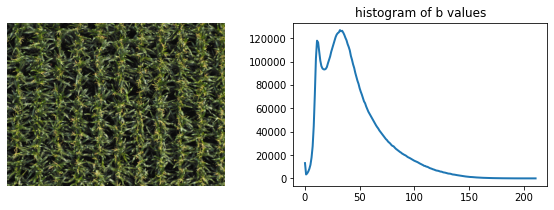

In [11]:
#creating and display Blue histogram
b_fig, b_axes = plt.subplots(1, 2, figsize=(10, 3))
b_axes[0].imshow(img_color)
b_axes[0].axis('off')
b_axes[1].plot(bhist_centers, bhist, lw=2)
b_axes[1].set_title('histogram of b values')

In [12]:
#Tassels are most visible/isolate in the 180-190 threshold range. 
th, field_th = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

Text(0.5, 1.0, 'threshold of 180')

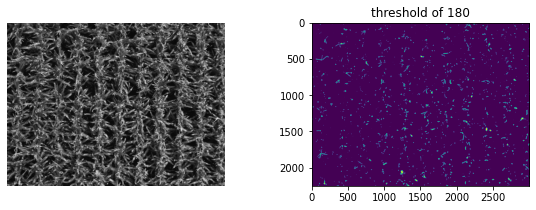

In [13]:
th_fig, th_axes = plt.subplots(1, 2, figsize=(10, 3))
th_axes[0].imshow(gray, cmap=plt.cm.gray)
th_axes[0].axis('off')
th_axes[1].imshow(field_th)
th_axes[1].set_title('threshold of 180')

## Segmentation Methods

#### Watershed Segmentation 

In [14]:
import skimage
from skimage import io
from skimage import img_as_uint
from skimage import feature

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib widget

In [15]:
#performing the canny edge detection on the thresholded gray scale image
edges = feature.canny(field_th)

(-0.5, 2999.5, 2249.5, -0.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
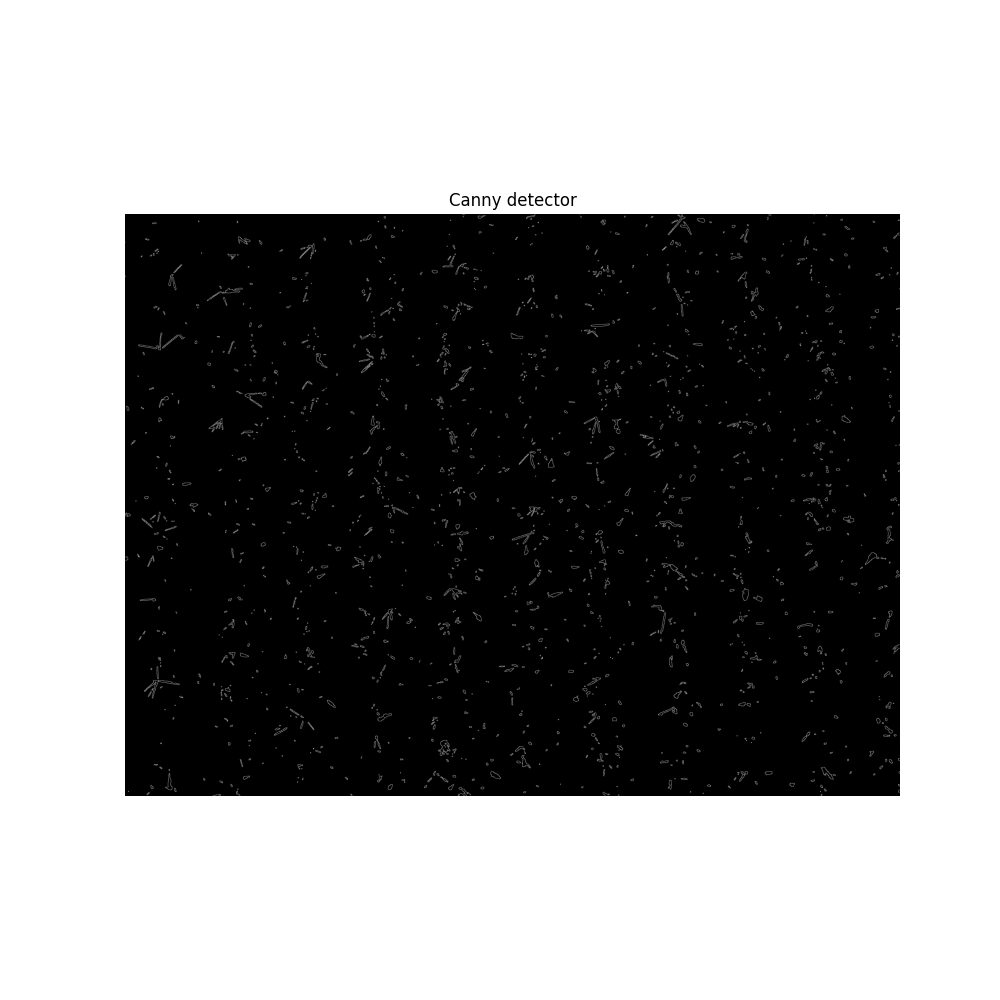

In [16]:
edges_fig, edges_ax = plt.subplots(figsize=(10, 10))
edges_ax.imshow(edges, cmap=plt.cm.gray)
edges_ax.set_title('Canny detector')
edges_ax.axis('off')

(-0.5, 2999.5, 2249.5, -0.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
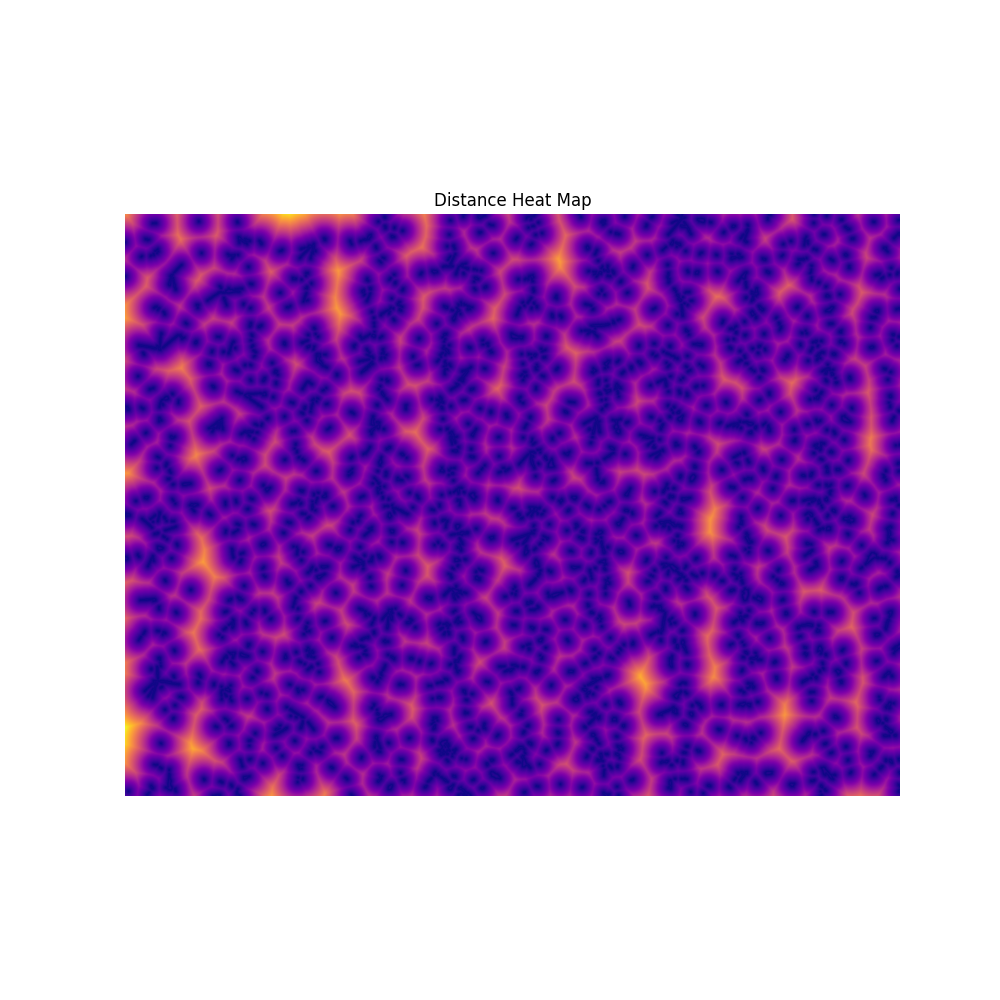

In [17]:
from scipy import ndimage

#eucleadian distance transform calculates the distance
#between objects in the negative space of the edges image
#(the ~ indicates negative) 
dt = ndimage.distance_transform_edt(~edges) 

#display the figure
dist_fig, dist_ax = plt.subplots(figsize=(10, 10))
dist_ax.imshow(dt, cmap=plt.cm.plasma)
dist_ax.set_title('Distance Heat Map')
dist_ax.axis('off')

#displays the distances between the edges of the tassels
#the landscape we will fill up using watershed.

In [18]:
#plot the peak points on the heat map
local_max = feature.peak_local_max(dt, indices=False, min_distance=8)

In [19]:
#label the peak points
from skimage import measure

markers = measure.label(local_max)

In [20]:
#inverting the threshold image for easier view with the segments
inverted_th = ~field_th

In [21]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
marked_copy = segmentation.mark_boundaries(inverted_th, labels)

Text(0.5, 1.0, 'Boundaries')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
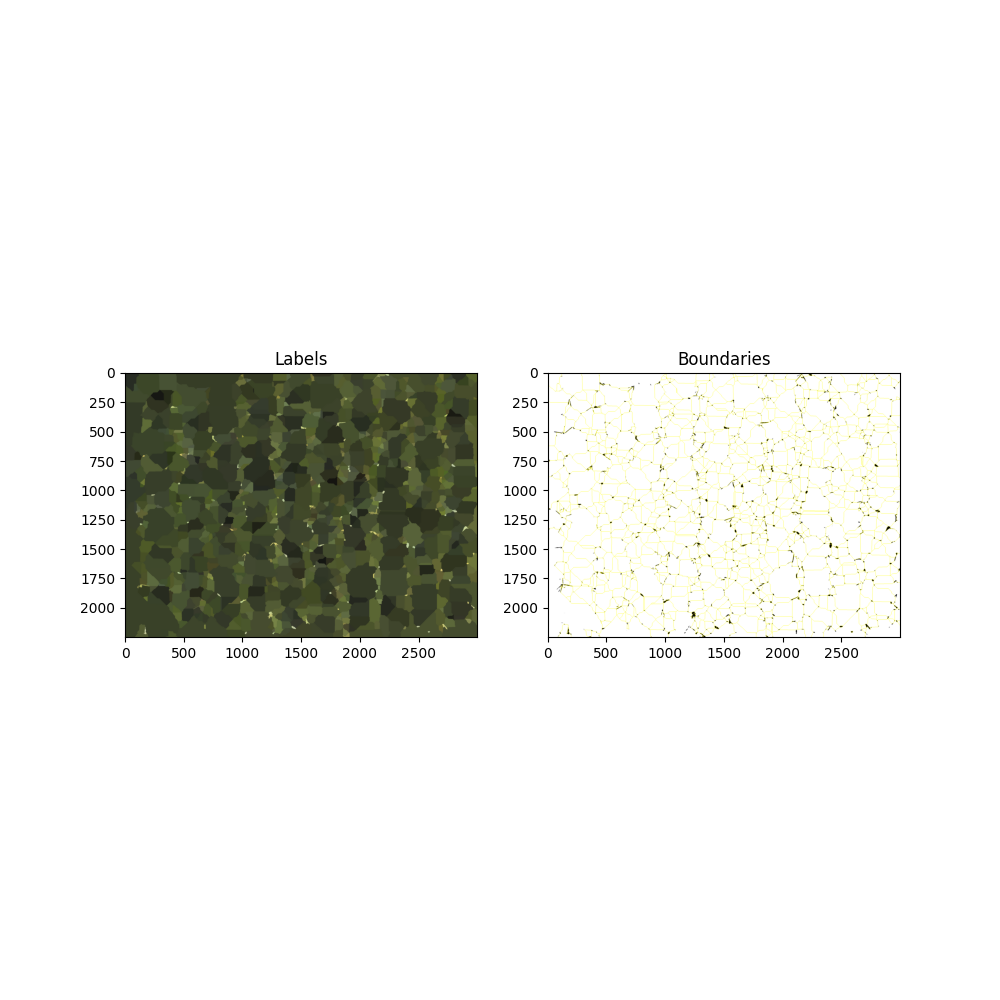

In [22]:
from skimage import color

#labels and the segmented image
bd_fig, bd_axes = plt.subplots(1, 2, figsize=(10, 10))
bd_axes[0].imshow(color.label2rgb(labels,image=img_color,kind='avg'))
bd_axes[0].set_title('Labels')
bd_axes[1].imshow(marked_copy)
bd_axes[1].set_title('Boundaries')

In [23]:
#saving the Watershed segmented image
skimage.io.imsave('watershed_segmented_image_tassels.jpg', skimage.img_as_ubyte(marked_copy))

#### Random Walker Segmentation

In [24]:
#from https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_random_walker_segmentation.html
#this worked fairly well and could be adopted w. some more experimentation

from skimage.segmentation import random_walker
from skimage.exposure import rescale_intensity

rng = np.random.default_rng()

# Generate noisy synthetic data
data = skimage.img_as_float(gray)
sigma = 0.20
data += rng.normal(loc=0, scale=sigma, size=data.shape)
data = rescale_intensity(data, in_range=(-sigma, 1 + sigma),
                         out_range=(-1, 1))

# The range of the binary image spans over (-1, 1).
# Choosing the hottest and the coldest pixels as markers.
walker_markers = np.zeros(data.shape, dtype=np.uint)
walker_markers[data < -0.95] = 1
walker_markers[data > 0.95] = 2

# Run random walker algorithm
walker_labels = random_walker(data, walker_markers, beta=10, mode='bf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
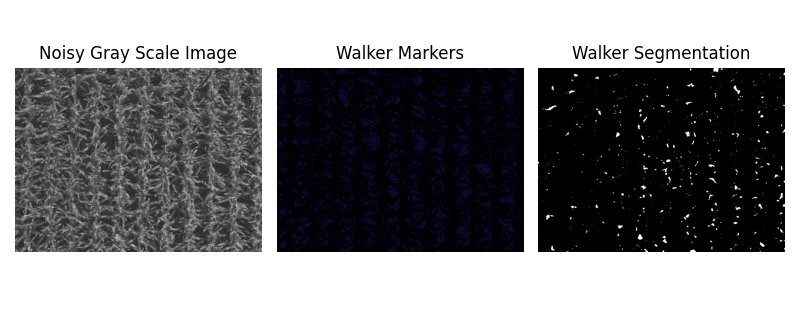

In [25]:
# Plot results
walker_fig, (walker_fig_ax1, walker_fig_ax2, walker_fig_ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
walker_fig_ax1.imshow(data, cmap='gray')
walker_fig_ax1.axis('off')
walker_fig_ax1.set_title('Noisy Gray Scale Image')
walker_fig_ax2.imshow(walker_markers, cmap='magma')
walker_fig_ax2.axis('off')
walker_fig_ax2.set_title('Walker Markers')
walker_fig_ax3.imshow(walker_labels, cmap='gray')
walker_fig_ax3.axis('off')
walker_fig_ax3.set_title('Walker Segmentation')

walker_fig.tight_layout()

In [26]:
#saving the walker segmented image
skimage.io.imsave('walker_segmented_image.jpg', walker_labels)

/var/folders/lf/z51zwvcx5fj_3dmt3xsb4mch0000gn/T/ipykernel_36610/1489856168.py:2: UserWarning: walker_segmented_image.jpg is a low contrast image
  skimage.io.imsave('walker_segmented_image.jpg', walker_labels)
Lossy conversion from int32 to uint8. Range [1, 2]. Convert image to uint8 prior to saving to suppress this warning.


#### Color Space

In [27]:
#libraries to viz the 3D color space of the image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

Text(0.5, 0, 'Blue')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
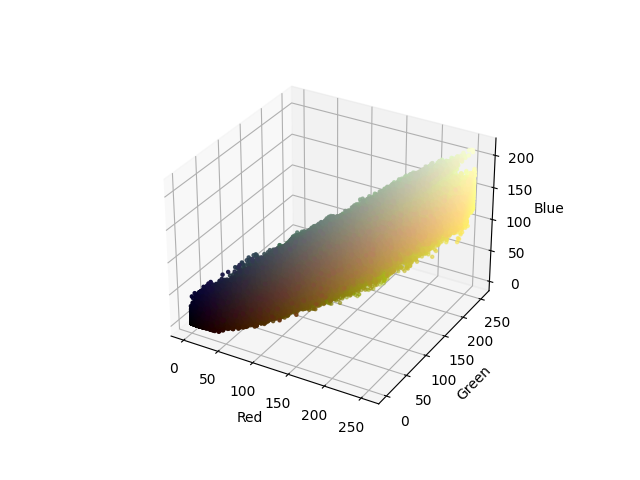

In [28]:
#split RGB
r, g, b = cv2.split(img_color)
rgb_fig = plt.figure()
rgb_axis = rgb_fig.add_subplot(1, 1, 1, projection="3d")

#next is flattening the pixels into a list
pixel_colors = img_color.reshape((np.shape(img_color)[0]*np.shape(img_color)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

#viz the RGB color space
rgb_axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
rgb_axis.set_xlabel("Red")
rgb_axis.set_ylabel("Green")
rgb_axis.set_zlabel("Blue")

Text(0.5, 0, 'Value')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
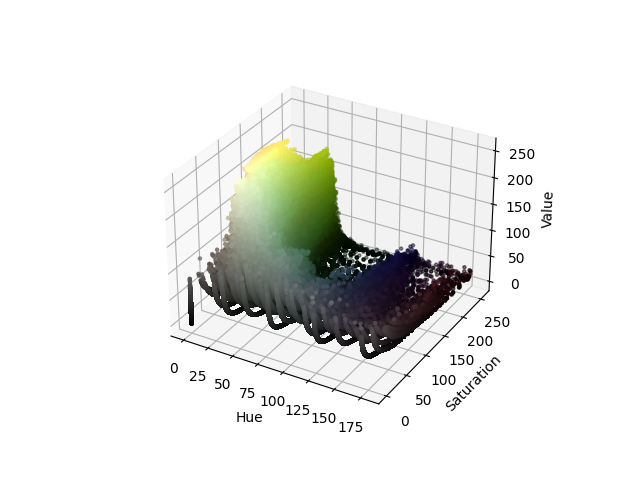

In [29]:
hsv_color = cv2.cvtColor(img_color, cv2.COLOR_RGB2HSV)
    
h, s, v = cv2.split(hsv_color)
hsv_fig = plt.figure()
hsv_axis = hsv_fig.add_subplot(1, 1, 1, projection="3d")

hsv_axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
hsv_axis.set_xlabel("Hue")
hsv_axis.set_ylabel("Saturation")
hsv_axis.set_zlabel("Value")

The images take up too much space in memory. See part 2 for completed PCA and KMeans.

### Preparing an image array

In [ ]:
#returns normalized rbg vals
def process_image(image):
    img_arr = []
    im = cv2.imread(pic) #open image
    color_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #convert from BGR to RGB
    rgb_img = color_img/255
    hsv_img = rgb2hsv(rgb_img) #convert to HSV
    combo_img = cv2.addWeighted(rgb_img, 1, hsv_img, .70, 0) #combine the images into one array
    image_arr.append(combo_img) #add combo image to list
        
    return img_arr

#returns the image's name
def pic_name(image):
    s = str(image)
    start = s.find('Img_')
    end = s.find('.jpg', start)
    imagename = s[start:end]
                       
    return imagename

In [ ]:
#change directory
os.chdir('/Users/petri142/CornTasselingProject/train')

#create giant list by extracting the pixel values from every image
img_arr = []
for pic in glob.glob('*.jpg'): 
    #imname = pic_name(pic) #get name
    #img_arr.append(imname)
    im = cv2.imread(pic) #open image
    color_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #convert from BGR to RGB
    rgb_img = color_img/255 #normalize RGB
    hsv_img = rgb2hsv(rgb_img) #convert RGB to HSV
    combo_img = cv2.addWeighted(rgb_img, 1, hsv_img, .70, 0) #combine the images into one array, giving RBG more weight
    img_arr.append(combo_img) #append to list

In [ ]:
#checking that the image list values look correct
print(img_arr[:2])

#convert to an array for training
img_arr = np.array(img_arr)

In [ ]:
#checking min/max for the array
max_v = img_arr[:].max()
min_v = img_arr[:].min()
#due to weighting of combo image, max is greater than 1
#however, it is important that the numbers be closely related in scale. A range of 0-2 is better than 0-10,000 as 
#10,000 would greatly skew the results
min_v, max_v

In [ ]:
#reshape to number of features which will be used in PCA
img_arr = img_arr.reshape((-1,6))
print(img_arr.shape)

In [ ]:
#a whole image is 3000 X 2250 = 6,750,000 (6.7 mil) pixs

### Principal Component Analysis 
#### PCA

In [ ]:
#reducing the from the six features to the three most important

from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(img_arr)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3'])

In [ ]:
#Identifying the most important PCAs

# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['R','B','G','H','S','V']

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

In [ ]:
pca_shp = principalComponents.shape
pca_shp

In [ ]:
principalDf.tail()

### K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
#I want to cluster the pca items, but don't know how to associate them back to the original pixels
#have only successfully been running kmeans on one image at a time
kmeans_pca = Kmeans(n_clusters = 5, init = 'k-means++', random_state = 1000)
kmeans_pca.fit(X)


In [ ]:
#kmeans from one image at a time
#image clusters on PCA
k = 8
_, labels, (centers) = cv2.kmeans(principalComponents, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
label_names = labels
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(principalComponents.shape)

In [ ]:
#a different kmeans
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
#this never finished
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit(pic2show)
plt.scatter(pic2show[:, 0], pic2show[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
# define stopping criteria (global for both)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.2)

In [ ]:
print(centers)

In [ ]:
skimage.io.imsave('combined_segmented_image_8_eqRGBHSV_.50.jpg', combo_segmented_image)

In [ ]:
# extracting only the hsv clusters
combo_mask = np.copy(rgb_img)

# convert to the shape of a vector of pixel values
combo_mask = combo_mask.reshape((-1, 3))

# cluster to keep
cluster = 1
combo_mask[combo_labels != cluster] = [0,0,0]

# convert back to original shape
combo_mask = combo_mask.reshape(rgb_img.shape)

# show the image
plt.imshow(combo_mask)
plt.show()

In [ ]:
#saving the image
skimage.io.imsave('combo_cluster_1of8_pic_Img_07272021_26_hsv.60.jpg', combo_mask)